In [2]:
# 导入库
import pandas as pd
import torch
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
from pylab import *
from matplotlib.font_manager import FontProperties
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 设置中文显示相关的配置
plt.rcParams['font.sans-serif']=['SimHei']  # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题

In [3]:
# # 异常处理
# # 读取CSV文件
# df = pd.read_csv('1.csv') #读机器学习（4张表结合）最终数据集

# # 选择数值型列进行异常值检测
# numerical_columns = df.select_dtypes(include=[np.number]).columns

# # 遍历每个数值型列，应用3西格玛原则
# for column in numerical_columns:
#     mean = df[column].mean()  # 计算列的均值
#     std = df[column].std()  # 计算列的标准差
#     lower_bound = mean - 3 * std  # 计算下界
#     upper_bound = mean + 3 * std  # 计算上界
    
#     # 标记异常值
#     df['{}_outlier'.format(column)] = (df[column] < lower_bound) | (df[column] > upper_bound)
    
#     # 可以选择删除异常值
#     df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # 打印处理后的DataFrame头几行，查看效果
# print(df.head())
# df.to_csv('yichangchulihou.csv', index=False, encoding='gbk')

In [4]:
# # 标准化
# import pandas as pd
# from scipy.stats import zscore

# # 读取CSV文件
# df = pd.read_csv('yichangchulihou.csv', encoding='gbk') 

# # 选择需要进行Z得分归一化的列
# # 假设我们对除了天气情况外的所有列进行归一化
# columns_to_normalize = ['二氧化碳浓度', '温度', '湿度', '光强', '生长系数', '蒸发量', '灌水量']

# # 对这些列应用Z得分归一化
# for column in columns_to_normalize:
#     df[column] = zscore(df[column])


# # 如果需要将归一化后的表格保存为新的CSV文件
# df.to_csv('normalized.csv', index=False, encoding='gbk')


# # 逆归一化
# # 读取归一化后的CSV文件
# df_normalized = pd.read_csv('normalized.csv', encoding='gbk')

# # 计算'灌水量'列的原始均值和标准差
# original_mean = df_normalized['灌水量'].mean()
# original_std = df_normalized['灌水量'].std()

# # 对'灌水量'进行逆归一化
# df_normalized['灌水量'] = df_normalized['灌水量'] * original_std + original_mean

# # 将逆归一化后的数据保存为新的CSV文件
# df_normalized.to_csv('denormalized.csv', index=False, encoding='gbk')

In [5]:
df_normalized = pd.read_csv('yichangchulihou.csv',encoding='gbk')
original_mean = df_normalized['灌水量'].mean()
original_std = df_normalized['灌水量'].std()
print(original_mean, original_std)

6710.966090343434 4605.476859616493


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('normalized.csv', encoding = 'gbk') 
df.head()
# # 计算相关系数矩阵
# corr = df.corr()
# # print(corr)
# # 使用seaborn绘制热力图
# plt.figure(figsize=(10, 8))  # 设置图形的大小
# sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
# # plt.title('相关系数热力图')  # 添加标题
# plt.show()  # 显示图形

,二氧化碳浓度,温度,湿度,光强,生长系数,蒸发量,天气_晴,天气_雨,灌水量
0,-0.994962,-1.020435,-0.645724,-1.874879,-1.584395,0.158611,1,0,-0.660907
1,-0.994962,-0.598446,-0.469477,1.242076,-1.584395,-1.176354,0,1,-1.259487
2,-0.994962,-0.551048,-0.325418,0.465159,-1.584395,0.603600,1,0,-0.461380
3,-0.994962,-1.856916,2.029650,-1.653710,-1.584395,0.158611,0,1,-0.660907
4,-0.994962,-2.213891,2.031133,-1.323765,-1.584395,-1.176354,0,1,-1.259487


In [7]:
# # 自动机器学习

# from autogluon.tabular import TabularPredictor

# # 读取数据
# data = pd.read_csv('normalize.csv',encoding='gbk')

# # 定义目标列名
# label_column = '灌水量'

# # 使用TabularPredictor自动进行训练
# predictor = TabularPredictor(label=label_column).fit(data,
#                                         num_stack_levels=1,
#                                         num_bag_folds=5)

# # 在训练数据上进行预测
# predictions = predictor.predict(data)

# # 打印预测结果
# print(predictions)

In [8]:
# xgb模型

# param_grid_xgb = {'n_estimators': [500],  'max_depth': [3], 'learning_rate': [0.05]}

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from xgboost import XGBRegressor
import math

# 读取CSV文件
df = pd.read_csv('normalized.csv', encoding='gbk')

# 假设最后一列是目标变量，其余列是特征
X = df.iloc[:, :-1]  # 特征
y = df.iloc[:, -1]   # 目标变量

# 按照0.7的比例随机划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化XGBoost回归模型
xgb_model = XGBRegressor(objective='reg:squarederror', 
                         n_estimators=500, 
                         random_state=42,
                         max_depth=3, 
                         learning_rate=0.05, 
                         subsample=0.75, 
                         colsample_bytree=0.95)


# 进行五折交叉验证并计算R-Squared
cross_val_r2 = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2').mean()
print(f'Cross-Validation R-Squared: {cross_val_r2:.4f}')

# 训练模型
xgb_model.fit(X_train, y_train)

# 预测测试集
y_pred = xgb_model.predict(X_test)

# 计算统计指标
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
sse = np.sum((y_test - y_pred) ** 2)
mae = mean_absolute_error(y_test, y_pred)

# 计算校正决定系数(Adjusted R-squared)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

# 计算平均绝对百分比误差(MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 输出统计指标
print(f'R-Squared: {r_squared:.4f}')
print(f'Adjusted R-Squared: {adjusted_r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Sum of Squared Errors (SSE): {sse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# # 使用get_params()方法打印出模型的所有参数及其值
# params = xgb_model.get_params()
# print(params)

Cross-Validation R-Squared: 0.9760
R-Squared: 0.9784
Adjusted R-Squared: 0.9769
Mean Squared Error (MSE): 0.0232
Root Mean Squared Error (RMSE): 0.1522
Sum of Squared Errors (SSE): 2.7575
Mean Absolute Error (MAE): 0.1121
Mean Absolute Percentage Error (MAPE): 47.64%


Feature ranking:
1. feature 蒸发量 (0.461763)
2. feature 二氧化碳浓度 (0.171240)
3. feature 生长系数 (0.170895)
4. feature 湿度 (0.097402)
5. feature 天气_晴 (0.063362)
6. feature 光强 (0.024354)
7. feature 温度 (0.009119)
8. feature 天气_雨 (0.001866)


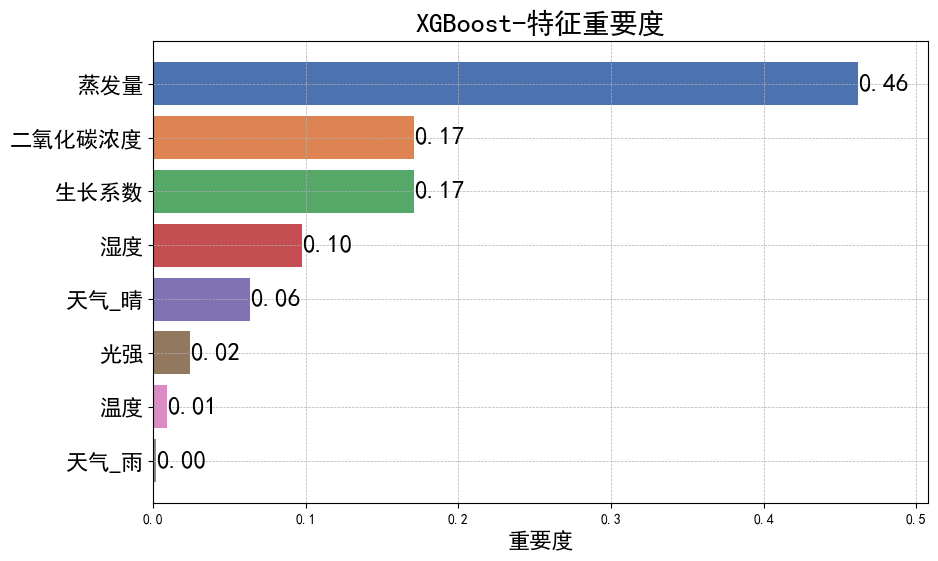

In [9]:
# 假设 xgb_model 是你已经训练好的 XGBoost 模型，X_train 是训练数据集
# 假设 feature_names 是一个包含特征中文名字的列表
feature_names = ['二氧化碳浓度', '温度', '湿度', '光强', 
                 '生长系数', '蒸发量', '天气_晴', '天气_雨']  # 这里需要填入所有特征的中文名字

# 获取特征重要度
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 打印特征重要度前10个
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# 设置Seaborn的调色板
palette = sns.color_palette("deep", X_train.shape[1])

# 绘制特征重要度图
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.title("XGBoost-特征重要度", fontsize=20, fontweight='bold')  # 设置标题和黑体
bars = plt.barh(range(X_train.shape[1]), importances[indices], color=palette, align="center")  # 垂直条形图
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in indices], fontsize=16)  # 设置y轴的标签为特征中文名字
plt.xlabel('重要度', fontsize=16)  # 设置x轴标签
plt.xlim([0, max(importances) + max(importances) * 0.1])  # 设置x轴的范围，稍微超出最大值一些以留出空间

# 添加数值标签
for bar, v in zip(bars, importances[indices]):
    plt.text(v, bar.get_y() + bar.get_height()/2, f"{v:.2f}", va='center', fontsize=18, color='black')  # 在每个条形上添加数值标签，并设置垂直对齐方式

plt.gca().invert_yaxis()  # 反转y轴，使得最重要的特征在上方
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线
# plt.savefig('xgboost_feature_importance.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

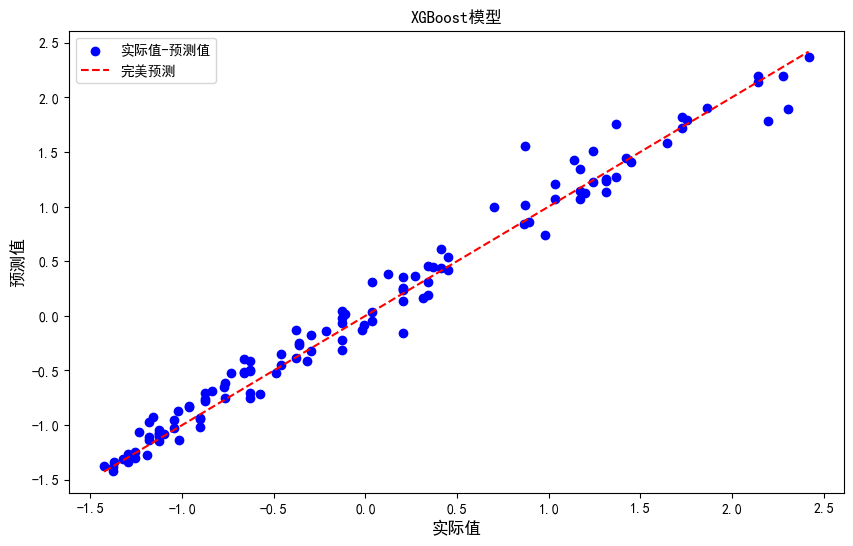

In [10]:
# 可视化预测结果和实际结果的对比
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='实际值-预测值')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='完美预测')
plt.title('XGBoost模型', fontsize=12)
plt.xlabel('实际值', fontsize=12)
plt.ylabel('预测值', fontsize=12)
plt.legend()
# plt.savefig('xgboost', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

In [11]:
#LGBM模型

import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# 读取数据
data = pd.read_csv('normalized.csv', encoding='gbk')

# 特征列和目标列
features = ['二氧化碳浓度', '温度', '湿度', '光强', '生长系数', '蒸发量', '天气_晴', '天气_雨']
target = '灌水量'

# 分离特征和目标
X = data[features]
y = data[target]

# 进行7:3的训练测试集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 五折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_k, X_val_k = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_k, y_val_k = y_train.iloc[train_index], y_train.iloc[val_index]
    
    lgbm_model = lgb.LGBMRegressor()
    lgbm_model.fit(X_train_k, y_train_k)
    
    y_val_pred = lgbm_model.predict(X_val_k)
    r2 = r2_score(y_val_k, y_val_pred)
    r2_scores.append(r2)

# 计算平均R-Squared
mean_r2 = np.mean(r2_scores)
print(f'Mean R-Squared from cross-validation: {mean_r2:.4f}')

# 在测试集上评估模型
lgbm_model.fit(X_train, y_train)
y_test_pred = lgbm_model.predict(X_test)

r_squared = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
sse = np.sum((y_test - y_test_pred) ** 2)
mae = mean_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f'R-Squared: {r_squared:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Sum of Squared Errors (SSE): {sse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


C:\Users\86152\AppData\Roaming\Python\Python39\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 10.0.1. Please consider upgrading.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 263
[LightGBM] [Info] Number of data points in the train set: 221, number of used features: 8
[LightGBM] [Info] Start training from score -0.034603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

Feature ranking:
1. feature 蒸发量 (0.299681)
2. feature 湿度 (0.252922)
3. feature 温度 (0.124336)
4. feature 光强 (0.120085)
5. feature 生长系数 (0.106270)
6. feature 二氧化碳浓度 (0.086079)
7. feature 天气_晴 (0.010627)
8. feature 天气_雨 (0.000000)


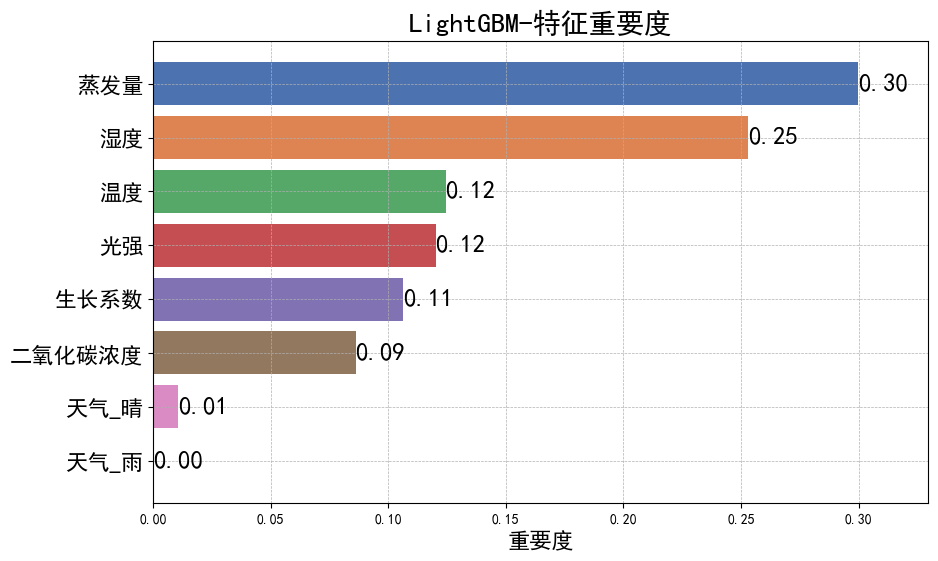

In [12]:
# 假设 lgbm_model 是你已经训练好的 LightGBM 模型
# 假设 X_train 是训练数据集
# 假设 feature_names 是一个包含特征中文名字的列表
feature_names = ['二氧化碳浓度', '温度', '湿度', '光强', 
                 '生长系数', '蒸发量', '天气_晴', '天气_雨']  # 这里需要填入所有特征的中文名字

# 获取特征重要度
importances = lgbm_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 归一化特征重要度
importances_normalized = importances / importances.sum()

# 打印特征重要度前10个
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances_normalized[indices[f]]))

# 设置Seaborn的调色板
palette = sns.color_palette("deep", X_train.shape[1])

# 绘制特征重要度图
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.title("LightGBM-特征重要度", fontsize=20, fontweight='bold')  # 设置标题和黑体
bars = plt.barh(range(X_train.shape[1]), importances_normalized[indices], color=palette, align="center")  # 垂直条形图
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in indices], fontsize=16)  # 设置y轴的标签为特征中文名字
plt.xlabel('重要度', fontsize=16)  # 设置x轴标签
plt.xlim([0, max(importances_normalized) + max(importances_normalized) * 0.1])  # 设置x轴的范围，稍微超出最大值一些以留出空间

# 添加数值标签
for bar, v in zip(bars, importances_normalized[indices]):
    plt.text(v, bar.get_y() + bar.get_height()/2, f"{v:.2f}", va='center', fontsize=18, color='black')  # 在每个条形上添加数值标签，并设置垂直对齐方式

plt.gca().invert_yaxis()  # 反转y轴，使得最重要的特征在上方
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线
# plt.savefig('lgbm_feature_importance.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

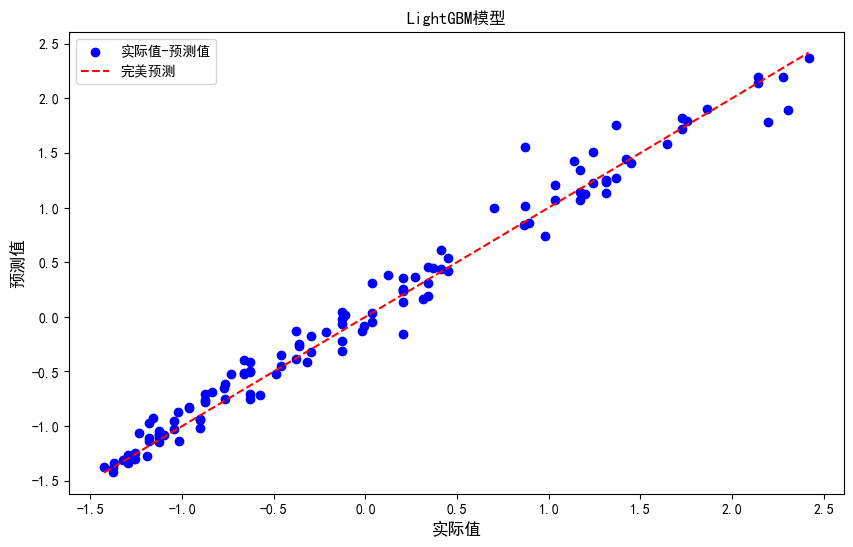

In [13]:
# 可视化预测结果和实际结果的对比
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='实际值-预测值')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='完美预测')
plt.title('LightGBM模型', fontsize=12)
plt.xlabel('实际值', fontsize=12)
plt.ylabel('预测值', fontsize=12)
plt.legend()
# plt.savefig('LGBM', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

In [14]:
# 随机森林模型

from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 读取数据
data = pd.read_csv('normalized.csv', encoding='gbk')

# 分离特征和目标变量
X = data.drop(columns=['灌水量'])
y = data['灌水量']

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化随机森林模型
rf_model = RandomForestRegressor(random_state=42)

# 五折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r_squared_list = []

for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # 训练模型
    rf_model.fit(X_train_kf, y_train_kf)
    
    # 验证模型
    y_val_pred = rf_model.predict(X_val_kf)
    
    # 计算R-Squared并保存
    r_squared = r2_score(y_val_kf, y_val_pred)
    r_squared_list.append(r_squared)

# 计算并输出验证集R-Squared的平均值
print(f'Validation R-Squared (mean): {np.mean(r_squared_list):.4f}')

# 在测试集上进行预测并计算评价指标
y_test_pred = rf_model.predict(X_test)

r_squared = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
sse = np.sum((y_test - y_test_pred) ** 2)
mae = mean_absolute_error(y_test, y_test_pred)
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# 输出测试集的评价指标
print(f'R-Squared: {r_squared:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Sum of Squared Errors (SSE): {sse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Validation R-Squared (mean): 0.9526
R-Squared: 0.9606
Mean Squared Error (MSE): 0.0423
Root Mean Squared Error (RMSE): 0.2058
Sum of Squared Errors (SSE): 5.0392
Mean Absolute Error (MAE): 0.1469
Mean Absolute Percentage Error (MAPE): 83.81%


Feature ranking:
1. feature 蒸发量 (0.818961)
2. feature 二氧化碳浓度 (0.063514)
3. feature 生长系数 (0.055589)
4. feature 湿度 (0.033724)
5. feature 温度 (0.013862)
6. feature 光强 (0.011027)
7. feature 天气_晴 (0.001682)
8. feature 天气_雨 (0.001640)


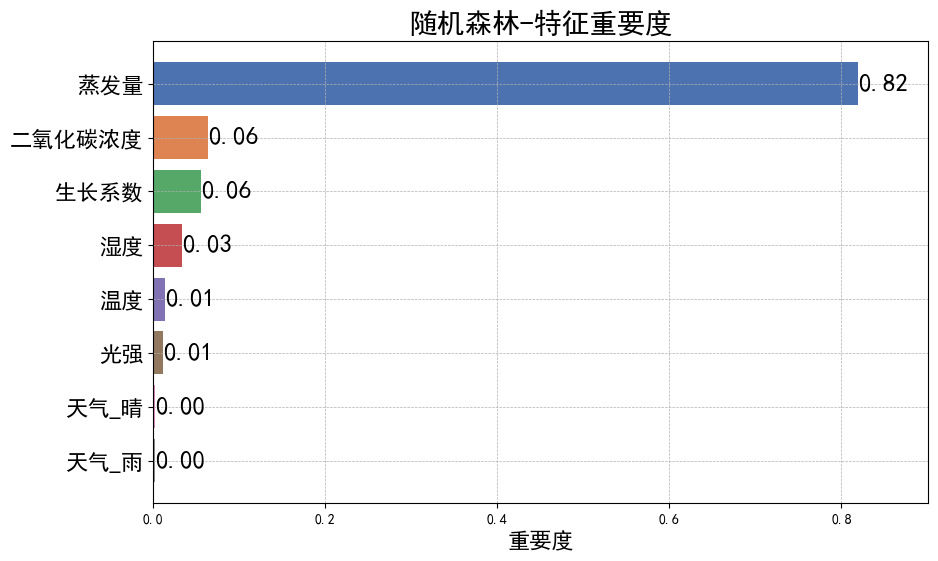

In [15]:
# 假设 rf_model 是你已经训练好的 XGBoost 模型，X_train 是训练数据集
# 假设 feature_names 是一个包含特征中文名字的列表
feature_names = ['二氧化碳浓度', '温度', '湿度', '光强', 
                 '生长系数', '蒸发量', '天气_晴', '天气_雨']  # 这里需要填入所有特征的中文名字

# 获取特征重要度
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 打印特征重要度前10个
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# 设置Seaborn的调色板
palette = sns.color_palette("deep", X_train.shape[1])

# 绘制特征重要度图
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.title("随机森林-特征重要度", fontsize=20, fontweight='bold')  # 设置标题和黑体
bars = plt.barh(range(X_train.shape[1]), importances[indices], color=palette, align="center")  # 垂直条形图
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in indices], fontsize=16)  # 设置y轴的标签为特征中文名字
plt.xlabel('重要度', fontsize=16)  # 设置x轴标签
plt.xlim([0, max(importances) + max(importances) * 0.1])  # 设置x轴的范围，稍微超出最大值一些以留出空间

# 添加数值标签
for bar, v in zip(bars, importances[indices]):
    plt.text(v, bar.get_y() + bar.get_height()/2, f"{v:.2f}", va='center', fontsize=18, color='black')  # 在每个条形上添加数值标签，并设置垂直对齐方式

plt.gca().invert_yaxis()  # 反转y轴，使得最重要的特征在上方
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线
# plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')  # 保存图片

plt.show()

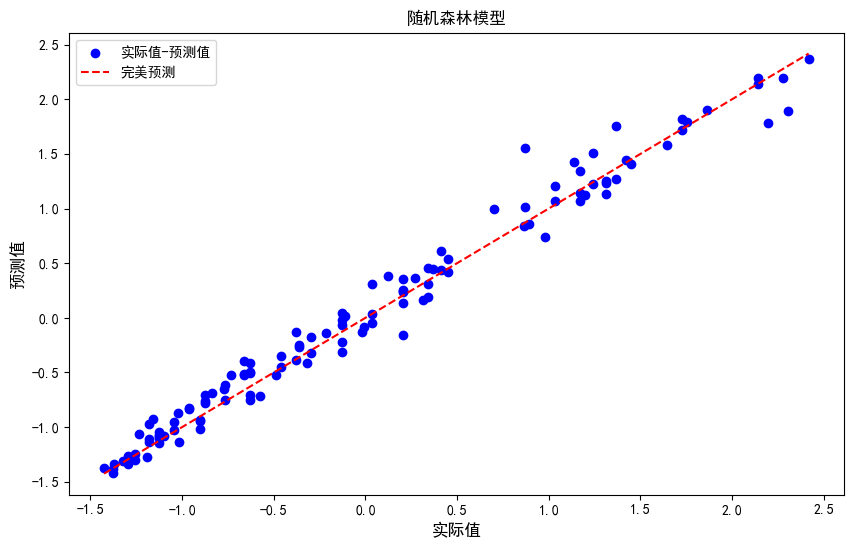

In [16]:
# 可视化预测结果和实际结果的对比
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='实际值-预测值')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='完美预测')
plt.title('随机森林模型', fontsize=12)
plt.xlabel('实际值', fontsize=12)
plt.ylabel('预测值', fontsize=12)
plt.legend()
# plt.savefig('随机森林', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

In [17]:
# 决策树模型

from sklearn.tree import DecisionTreeRegressor

# 读取数据集
data = pd.read_csv('normalized.csv', encoding='gbk')

# 提取特征和目标变量
X = data.drop(columns=['灌水量'])
y = data['灌水量']

# 按7:3的比例划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义决策树回归模型
DT_model = DecisionTreeRegressor(random_state=42)

# 进行五折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(DT_model, X_train, y_train, cv=kf, scoring='r2')

# 输出交叉验证的R-Squared
print(f'Cross-validated R-Squared: {cv_results.mean():.4f}')

# 在整个训练集上训练模型
DT_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = DT_model.predict(X_test)

# 计算评价指标
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
sse = ((y_test - y_pred) ** 2).sum()
mae = mean_absolute_error(y_test, y_pred)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100

# 输出测试集的评价指标
print(f'R-Squared: {r_squared:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Sum of Squared Errors (SSE): {sse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Cross-validated R-Squared: 0.9003
R-Squared: 0.9163
Mean Squared Error (MSE): 0.0899
Root Mean Squared Error (RMSE): 0.2999
Sum of Squared Errors (SSE): 10.7033
Mean Absolute Error (MAE): 0.1782
Mean Absolute Percentage Error (MAPE): 53.19%


C:\Users\86152\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
# # 决策树

# from sklearn import tree
# import graphviz

# feature_names = ['二氧化碳浓度', '温度', '湿度', '光强', 
#                  '生长系数', '蒸发量', '天气_晴', '天气_雨']  # 这里需要填入所有特征的中文名字
# # 可视化决策树
# plt.figure(figsize=(20,10))
# tree.plot_tree(DT_model, feature_names=feature_names, filled=True)
# plt.savefig('graduate.png', dpi = 3000)
# plt.show()

Feature ranking:
1. feature 蒸发量 (0.779629)
2. feature 二氧化碳浓度 (0.104239)
3. feature 生长系数 (0.070328)
4. feature 湿度 (0.031794)
5. feature 光强 (0.008448)
6. feature 温度 (0.005171)
7. feature 天气_雨 (0.000233)
8. feature 天气_晴 (0.000159)


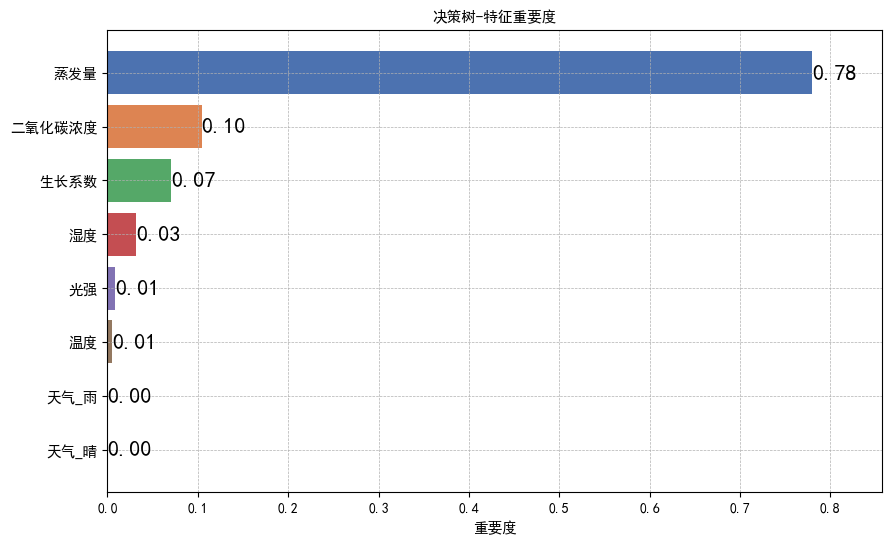

In [19]:
# 假设 DT_model 是你已经训练好的决策树模型，X_train 是训练数据集
# 假设 feature_names 是一个包含特征中文名字的列表
feature_names = ['二氧化碳浓度', '温度', '湿度', '光强', 
                 '生长系数', '蒸发量', '天气_晴', '天气_雨']  # 这里需要填入所有特征的中文名字

# 获取特征重要度
importances = DT_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 打印特征重要度前10个
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# 设置Seaborn的调色板
palette = sns.color_palette("deep", X_train.shape[1])

# 绘制特征重要度图
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.title("决策树-特征重要度", fontsize=10.5, fontweight='bold')  # 设置标题和黑体
bars = plt.barh(range(X_train.shape[1]), importances[indices], color=palette, align="center")  # 垂直条形图
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in indices], fontsize=10.5)  # 设置y轴的标签为特征中文名字
plt.xlabel('重要度', fontsize=10.5)  # 设置x轴标签
plt.xlim([0, max(importances) + max(importances) * 0.1])  # 设置x轴的范围，稍微超出最大值一些以留出空间

# 添加数值标签
for bar, v in zip(bars, importances[indices]):
    plt.text(v, bar.get_y() + bar.get_height()/2, f"{v:.2f}", va='center', fontsize=16, color='black')  # 在每个条形上添加数值标签，并设置垂直对齐方式

plt.gca().invert_yaxis()  # 反转y轴，使得最重要的特征在上方
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线
# plt.savefig('dt_feature_importance.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

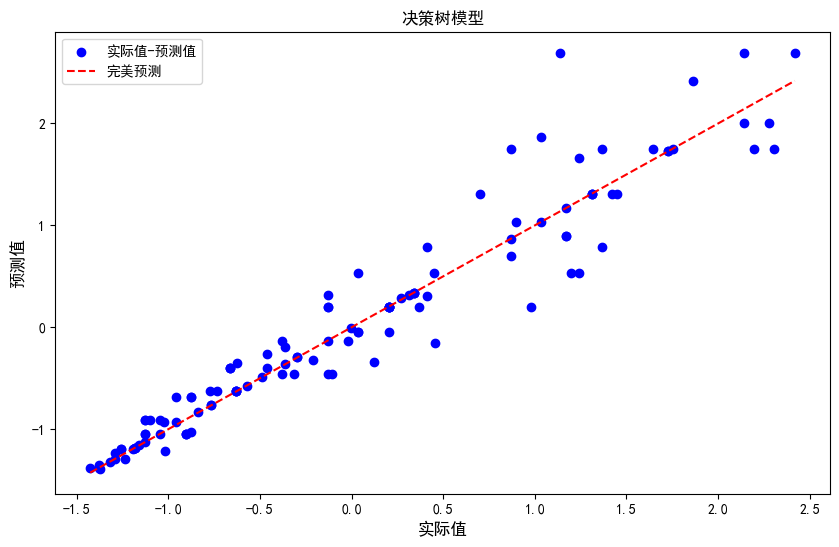

In [20]:
# 可视化预测结果和实际结果的对比
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='实际值-预测值')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='完美预测')
plt.title('决策树模型', fontsize=12)
plt.xlabel('实际值', fontsize=12)
plt.ylabel('预测值', fontsize=12)
plt.legend()
# plt.savefig('决策树', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

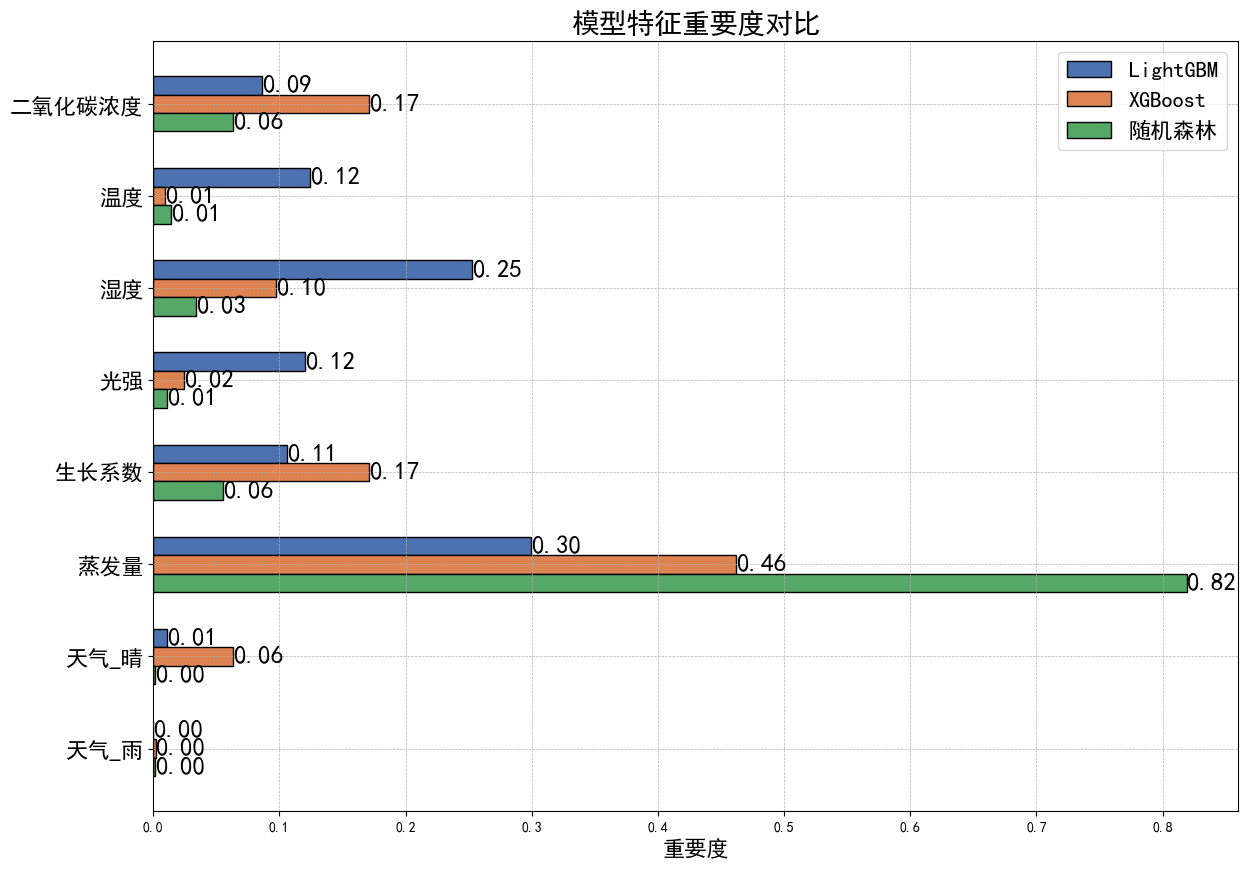

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 lgbm_model, xgb_model, rf_model 是你已经训练好的模型
# 假设 X_train 是训练数据集
# 假设 feature_names 是一个包含特征中文名字的列表
feature_names = ['二氧化碳浓度', '温度', '湿度', '光强', '生长系数', '蒸发量', '天气_晴', '天气_雨']

# 获取特征重要度
lgbm_importances = lgbm_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
rf_importances = rf_model.feature_importances_

# 归一化特征重要度
lgbm_importances_normalized = lgbm_importances / lgbm_importances.sum()
xgb_importances_normalized = xgb_importances / xgb_importances.sum()
rf_importances_normalized = rf_importances / rf_importances.sum()

# 绘制特征重要度图
plt.figure(figsize=(14, 10))  # 设置图形大小
plt.title("模型特征重要度对比", fontsize=20, fontweight='bold')  # 设置标题和黑体

# 设置Seaborn的调色板
palette = sns.color_palette("deep", 3)

# 绘制条形图
bar_width = 0.2  # 设置条形图的宽度
indices = np.arange(len(feature_names))  # 特征索引

plt.barh(indices, lgbm_importances_normalized, height=bar_width, label='LightGBM', color=palette[0], edgecolor='black')
plt.barh(indices + bar_width, xgb_importances_normalized, height=bar_width, label='XGBoost', color=palette[1], edgecolor='black')
plt.barh(indices + 2 * bar_width, rf_importances_normalized, height=bar_width, label='随机森林', color=palette[2], edgecolor='black')

# 设置y轴的标签为特征中文名字
plt.yticks(indices + bar_width, feature_names, fontsize=16)
plt.xlabel('重要度', fontsize=16)  # 设置x轴标签

# 添加图例
plt.legend(loc='best', fontsize=16)

# 添加数值标签
for i in range(len(indices)):
    plt.text(lgbm_importances_normalized[i], indices[i], f"{lgbm_importances_normalized[i]:.2f}", va='center', fontsize=18, color='black')
    plt.text(xgb_importances_normalized[i], indices[i] + bar_width, f"{xgb_importances_normalized[i]:.2f}", va='center', fontsize=18, color='black')
    plt.text(rf_importances_normalized[i], indices[i] + 2 * bar_width, f"{rf_importances_normalized[i]:.2f}", va='center', fontsize=18, color='black')

plt.gca().invert_yaxis()  # 反转y轴，使得最重要的特征在上方
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # 添加网格线

# plt.savefig('model_feature_importance_comparison.png', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()


In [22]:
# bp神经网络

# param_grid_bp = {'hidden_layer_sizes': [(350,200,10)],'alpha': [0.05], 'learning_rate': ['adaptive']}


from sklearn.neural_network import MLPRegressor

# 读取数据
data = pd.read_csv('normalized.csv', encoding='gbk')

# 提取特征和标签
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 构建 BP 神经网络模型
bp_model = MLPRegressor(hidden_layer_sizes=(100),  learning_rate='adaptive', activation='relu', solver='adam', random_state=42)
bp_model.fit(X_train, y_train)

# 进行预测
y_pred = bp_model.predict(X_test)

# 评估模型性能
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 输出结果
print(f'R-Squared: {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}')
print(f'Sum of Squared Errors (SSE): {mse * len(y_test):.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

R-Squared: 0.9732
Mean Squared Error (MSE): 0.0288
Root Mean Squared Error (RMSE): 0.1698
Sum of Squared Errors (SSE): 3.4323
Mean Absolute Error (MAE): 0.1177
Mean Absolute Percentage Error (MAPE): 41.54%


In [23]:
# # 支持向量回归模型

# from sklearn.model_selection import learning_curve

# # 计算学习曲线
# train_sizes, train_scores, test_scores = learning_curve(bp_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# # 计算训练分数的平均值和标准差
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)

# # 计算测试分数的平均值和标准差
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# # 绘制图形
# plt.figure(figsize=(10, 6))
# plt.title("BP神经网络学习曲线",fontsize=14)
# plt.xlabel("训练样本数量", fontsize=12)
# plt.ylabel("得分",fontsize=12)
# plt.grid()
# # 绘制训练分数的置信区间
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1,
#                  color="r")
# # 绘制测试分数的置信区间
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.1,
#                  color="g")
# # 绘制训练分数和交叉验证分数的曲线
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练得分")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证得分")
# # 添加图例
# plt.legend(loc="best")
# plt.savefig("BP_learning_curve.png",dpi=300,bbox_inches='tight')
# # 显示图形
# plt.show()

In [24]:
# bp神经网络

# param_grid_bp = {'hidden_layer_sizes': [(350,200,10)],'alpha': [0.05], 'learning_rate': ['adaptive']}


from sklearn.neural_network import MLPRegressor

# 读取数据
data = pd.read_csv('normalized.csv', encoding='gbk')

# 提取特征和标签
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 构建 BP 神经网络模型
bp_model = MLPRegressor(hidden_layer_sizes=(350,200,10), alpha=0.05, learning_rate='adaptive', activation='relu', solver='adam', random_state=42)
bp_model.fit(X_train, y_train)

# 进行预测
y_pred = bp_model.predict(X_test)

# 评估模型性能
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 输出结果
print(f'R-Squared: {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}')
print(f'Sum of Squared Errors (SSE): {mse * len(y_test):.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

R-Squared: 0.9837
Mean Squared Error (MSE): 0.0175
Root Mean Squared Error (RMSE): 0.1322
Sum of Squared Errors (SSE): 2.0802
Mean Absolute Error (MAE): 0.0755
Mean Absolute Percentage Error (MAPE): 33.17%


C:\Users\86152\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
# import tensorflow as tf
# from tensorflow.keras.utils import plot_model

# # 350,200,200,100,50,10
# # 定义模型
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(350, activation='relu', input_shape=(1,)),
#     tf.keras.layers.Dense(200, activation='relu'),
#     tf.keras.layers.Dense(200, activation='relu'),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dense(50, activation='relu'),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dense(1)
# ])

# # 打印模型摘要
# model.summary()

# # 可视化模型并保存为文件
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [26]:
# # bp神经网络调参

# from sklearn.neural_network import MLPRegressor

# # 读取数据
# data = pd.read_csv('normalized.csv', encoding='gbk')

# # 提取特征和标签
# X = data.iloc[:, :-1].values
# y = data.iloc[:, -1].values

# # 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# # 构建 BP 神经网络模型
# bp_model = MLPRegressor(hidden_layer_sizes=(350,200,200,100,50,10), activation='relu', solver='adam', random_state=42)
# bp_model.fit(X_train, y_train)

# y_test = bp_model.predict(X_train)


# r2 = r2_score(y_train, y_test)
# print(f'R-Squared: {r2:.4f}')
# # # 进行五折交叉验证并输出交叉验证集R方
# # cv_scores = cross_val_score(bp_model, X, y, cv=5, scoring='r2')
# # print("Cross-Validation R-Squared: %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))

# # # 进行预测
# # y_pred = bp_model.predict(X_test)

# # # 评估模型性能
# # r2 = r2_score(y_test, y_pred)
# # mse = mean_squared_error(y_test, y_pred)
# # mae = mean_absolute_error(y_test, y_pred)
# # mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# # # 输出结果
# # print(f'R-Squared: {r2:.4f}')
# # print(f'Mean Squared Error (MSE): {mse:.4f}')
# # print(f'Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}')
# # print(f'Sum of Squared Errors (SSE): {mse * len(y_test):.4f}')
# # print(f'Mean Absolute Error (MAE): {mae:.4f}')
# # print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

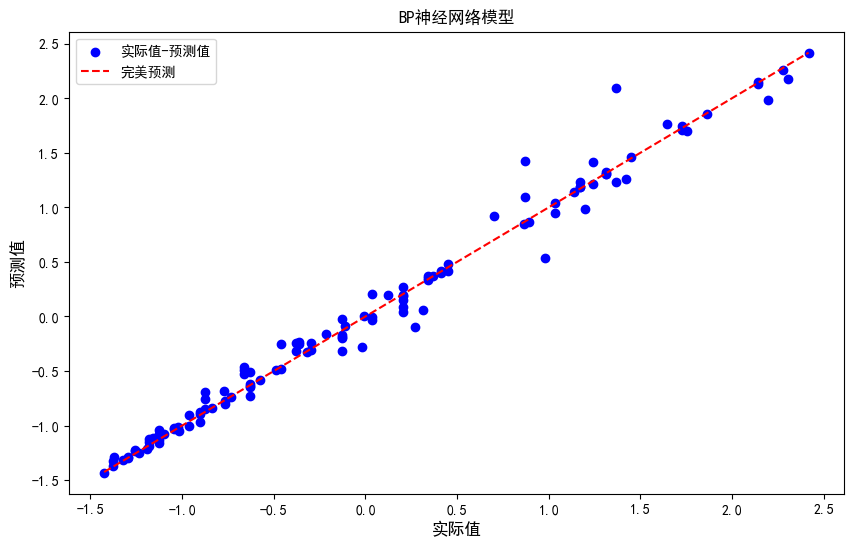

In [27]:
# 可视化预测结果和实际结果的对比
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='实际值-预测值')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='完美预测')
plt.title('BP神经网络模型', fontsize=12)
plt.xlabel('实际值', fontsize=12)
plt.ylabel('预测值', fontsize=12)
plt.legend()
# plt.savefig('BP神经网络', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

In [28]:
# # xgb_model

# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# plt.figure(figsize=(10, 6))
# plt.title("Learning Curve")
# plt.xlabel("Training Examples")
# plt.ylabel("Score")
# plt.grid()
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1,
#                  color="r")
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.1,
#                  color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
# plt.legend(loc="best")
# # plt.savefig('bp_learning_curve.png',dpi=300)
# plt.show()

In [29]:
# # svr调参

# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# # 初始化SVR模型
# svr = SVR(kernel='rbf')

# # 定义参数网格
# param_grid = {
#     'C': [4],
#     'epsilon': [0.001],
#     'gamma': ['scale', 'auto'],
#     'kernel': ['rbf', 'linear']
# }

# # 创建网格搜索对象
# grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, verbose=2)

# # 执行网格搜索
# grid_search.fit(X_train, y_train)

# # 输出最佳参数和评分
# print("Best parameters found:")
# print(grid_search.best_params_)
# print("Best score found:")
# print(grid_search.best_score_)

In [30]:
# svr_model
# param_grid_svr = { 'C': [10],  'epsilon': [0.01]}

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 读取数据
data = pd.read_csv('normalized.csv',encoding='gbk')

# 划分特征和目标变量
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 构建SVR模型
svr_model = SVR(C=10, epsilon=0.01, gamma='auto', kernel='rbf')

# 五折交叉验证
cv_scores = cross_val_score(svr_model, X_train, y_train, cv=5).mean()
print(f'Cross-Validation Score: {cv_scores:.4f}')

# 拟合模型
svr_model.fit(X_train, y_train)

# 预测
y_pred = svr_model.predict(X_test)

# 计算评估指标
r_squared = svr_model.score(X_test, y_test)
adjusted_r2 = 1 - (1 - r_squared) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
sse = np.sum((y_test - y_pred)**2)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 输出评估指标
print(f'R-Squared: {r_squared:.4f}')
print(f'Adjusted R-Squared: {adjusted_r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Sum of Squared Errors (SSE): {sse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Cross-Validation Score: 0.9708
R-Squared: 0.9823
Adjusted R-Squared: 0.9810
Mean Squared Error (MSE): 0.0191
Root Mean Squared Error (RMSE): 0.1381
Sum of Squared Errors (SSE): 2.2683
Mean Absolute Error (MAE): 0.0814
Mean Absolute Percentage Error (MAPE): 33.18%


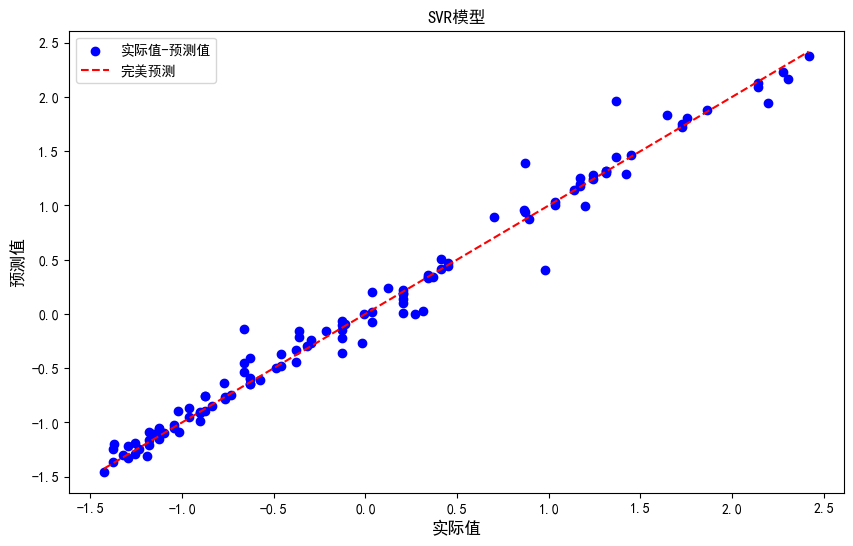

In [31]:
# 可视化预测结果和实际结果的对比
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='实际值-预测值')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='完美预测')
plt.title('SVR模型', fontsize=12)
plt.xlabel('实际值', fontsize=12)
plt.ylabel('预测值', fontsize=12)
plt.legend()
# plt.savefig('svr', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

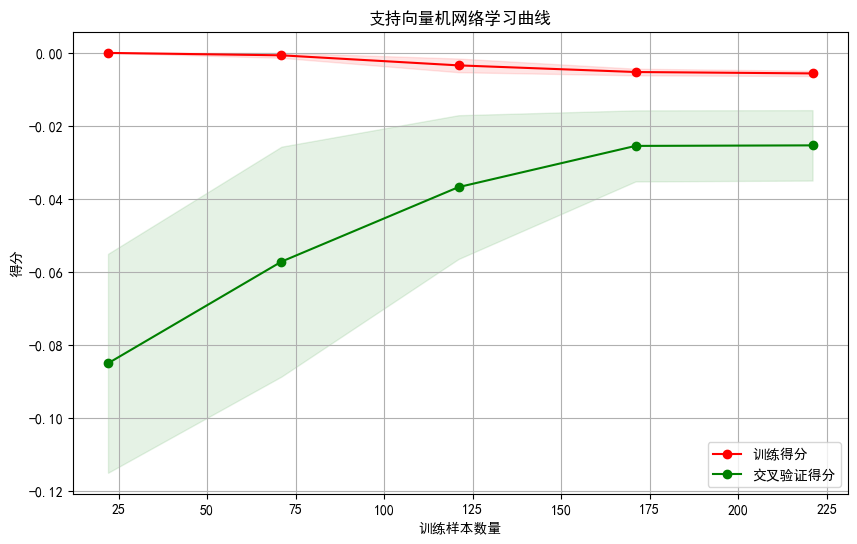

In [32]:
# 支持向量回归模型

from sklearn.model_selection import learning_curve

# 计算学习曲线
train_sizes, train_scores, test_scores = learning_curve(svr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# 计算训练分数的平均值和标准差
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# 计算测试分数的平均值和标准差
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 绘制图形
plt.figure(figsize=(10, 6))
plt.title("支持向量机网络学习曲线")
plt.xlabel("训练样本数量")
plt.ylabel("得分")
plt.grid()
# 绘制训练分数的置信区间
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
# 绘制测试分数的置信区间
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
# 绘制训练分数和交叉验证分数的曲线
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练得分")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证得分")
# 添加图例
plt.legend(loc="best")
# 显示图形
plt.show()

In [33]:
# svr bp xgb

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import BayesianRidge

# 读取数据
data = pd.read_csv('normalized.csv',encoding='gbk')

# 划分特征和目标变量
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 创建堆叠回归器
estimators = [
    ('svr', svr_model), 
    ('xgb', xgb_model),
     ('bp', bp_model),
    #  ('rf', rf_model),
    #  ('lgbm', lgbm_model)
]

ridge = Lasso(alpha=5e-3)
# ridge = BayesianRidge()
# ridge = LinearRegression()
stacking_reg = StackingRegressor(estimators=estimators, final_estimator=ridge)

# # 划分数据集并进行五折交叉验证
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(stacking_reg, X_train, y_train, cv=kf)

# # 输出交叉验证分数
# print("Cross-Validation Scores:", cv_scores)
# print(f'Mean Cross-Validation Score: {cv_scores.mean():.4f}')
# print()

# 训练堆叠回归器
stacking_reg.fit(X_train, y_train)

# 测试堆叠回归器
y_pred = stacking_reg.predict(X_test)

# 计算评价指标
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
mape = (abs((y_test - y_pred) / y_test).mean()) * 100
r2 = r2_score(y_test, y_pred)

# 输出评价指标
print("Stacking Regressor Performance on Test Set:")
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R²: {r2:.4f}')

C:\Users\86152\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\86152\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\86152\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\86152\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Stacking Regressor Performance on Test Set:
MSE: 0.0163
RMSE: 0.1279
MAE: 0.0786
MAPE: 36.3096%
R²: 0.9848


C:\Users\86152\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
# # 集成模型

# from sklearn.model_selection import learning_curve

# # 计算学习曲线
# train_sizes, train_scores, test_scores = learning_curve(stacking_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# # 计算训练分数的平均值和标准差
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)

# # 计算测试分数的平均值和标准差
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# # 绘制图形
# plt.figure(figsize=(10, 6))
# plt.title("集成模型学习曲线",fontsize=14)
# plt.xlabel("训练样本数量", fontsize=12)
# plt.ylabel("得分",fontsize=12)
# plt.grid()
# # 绘制训练分数的置信区间
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1,
#                  color="r")
# # 绘制测试分数的置信区间
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.1,
#                  color="g")
# # 绘制训练分数和交叉验证分数的曲线
# plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="训练得分")
# plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="交叉验证得分")
# # 添加图例
# plt.legend(loc="best")
# # 保存图片
# # plt.savefig("集成learning_curve.png", dpi=300, bbox_inches='tight')
# # 显示图形
# plt.show()

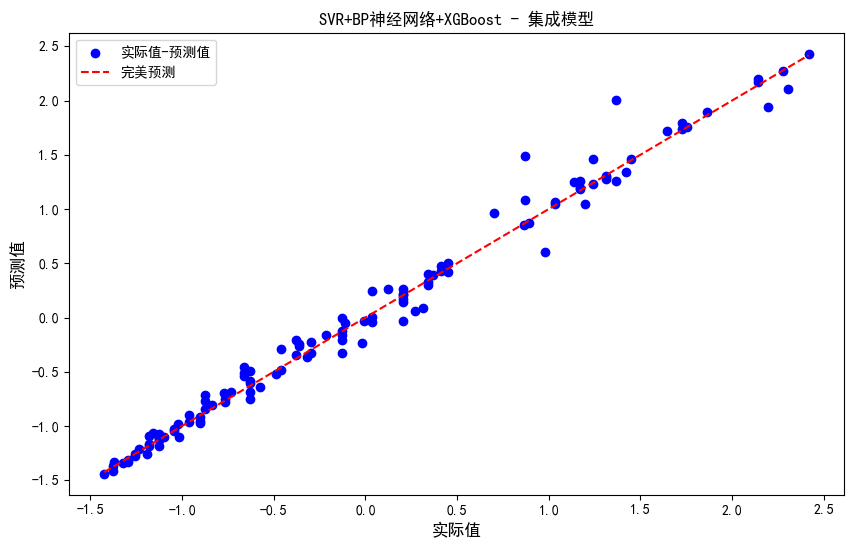

In [35]:
# 可视化预测结果和实际结果的对比
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='实际值-预测值')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='完美预测')
plt.title('SVR+BP神经网络+XGBoost - 集成模型', fontsize=12)
plt.xlabel('实际值', fontsize=12)
plt.ylabel('预测值', fontsize=12)
plt.legend()
# plt.savefig('集成', dpi=300, bbox_inches='tight')  # 保存图片
plt.show()

In [36]:
# import pandas as pd
# from sklearn.datasets import make_regression
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
# from sklearn.ensemble import StackingRegressor
# from sklearn.svm import SVR
# from sklearn.neural_network import MLPRegressor
# import xgboost as xgb
# from sklearn.linear_model import Lasso
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# # 读取数据
# data = pd.read_csv('normalized.csv', encoding='gbk')

# # 划分特征和目标变量
# X = data.iloc[:, :-1].values
# y = data.iloc[:, -1].values

# # 划分数据集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # 定义超参数搜索范围
# param_grid_svr = {
#     'C': [10],
#     'epsilon': [0.01]
# }

# param_grid_bp = {
#     'hidden_layer_sizes': [(350,200,10)],
#     'activation': ['relu'],
#     'solver': ['adam'],
#     'alpha': [0.05],
#     'learning_rate': ['adaptive']
# }

# param_grid_xgb = {
#     'n_estimators': [500],
#     'max_depth': [3],
#     'learning_rate': [0.05]
# }

# # 创建模型
# svr = SVR()
# bp = MLPRegressor(max_iter=1000)
# xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# # 使用GridSearchCV进行超参数调优
# grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2')
# grid_bp = GridSearchCV(bp, param_grid_bp, cv=5, scoring='r2')
# grid_xgb = GridSearchCV(xgb_reg, param_grid_xgb, cv=5, scoring='r2')

# # 拟合模型
# grid_svr.fit(X_train, y_train)
# grid_bp.fit(X_train, y_train)
# grid_xgb.fit(X_train, y_train)

# # 输出最佳参数
# print("Best parameters for SVR:", grid_svr.best_params_)
# print("Best parameters for BP:", grid_bp.best_params_)
# print("Best parameters for XGB:", grid_xgb.best_params_)

# # 使用最佳参数创建最终模型
# best_svr = grid_svr.best_estimator_
# best_bp = grid_bp.best_estimator_
# best_xgb = grid_xgb.best_estimator_

# # 创建堆叠回归器
# estimators = [
#     ('svr', best_svr),
#     ('bp', best_bp),
#     ('xgb', best_xgb)
# ]

# final_estimator = Lasso(alpha=0.005)
# stacking_reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

# # # 五折交叉验证
# # kf = KFold(n_splits=5, shuffle=True, random_state=42)
# # cv_scores = cross_val_score(stacking_reg, X_train, y_train, cv=kf, scoring='r2')

# # # 输出交叉验证分数
# # print("Cross-Validation Scores:", cv_scores)
# # print(f'Mean Cross-Validation Score: {cv_scores.mean():.4f}')
# # print()

# # 训练堆叠回归器
# stacking_reg.fit(X_train, y_train)

# # 测试堆叠回归器
# y_pred = stacking_reg.predict(X_test)

# # 计算评价指标
# mse = mean_squared_error(y_test, y_pred)
# rmse = mse ** 0.5
# mae = mean_absolute_error(y_test, y_pred)
# mape = (abs((y_test - y_pred) / y_test).mean()) * 100
# r2 = r2_score(y_test, y_pred)

# # 输出评价指标
# print("Stacking Regressor Performance on Test Set:")
# print(f'MSE: {mse:.4f}')
# print(f'RMSE: {rmse:.4f}')
# print(f'MAE: {mae:.4f}')
# print(f'MAPE: {mape:.4f}%')
# print(f'R²: {r2:.4f}')

In [37]:
# y_pred = stacking_reg.predict(X_train)

# r2 = r2_score(y_train, y_pred)
# print(f'R²: {r2:.4f}')

In [38]:
# # 保存模型
# import joblib
# joblib.dump(stacking_reg, 'stacking_regressor_model.joblib')

In [39]:
print("2020-05-21-10:24")

2020-05-21-10:24
